In [1]:
import sqlite3
import pandas as pd
from pandas.core.frame import DataFrame
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

from matplotlib import pyplot as plt
from time import sleep

import matplotlib


# import gnuplotlib as gp
import numpy as np

import sys

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
import requests

* Goal: demo user driver develop process (focus on read-only driver)
* Outcome: a workable user-developed driver (request data from currency public RestAPI.) P.S.: To verify, Publish data in Sqlite-historian, display the result.
* Pre-requisite: a running volttron instance (ref: single-machien setup)
* Plan: ...

In [ ]:
# Step x: configure the user-dev-driver-template.csv

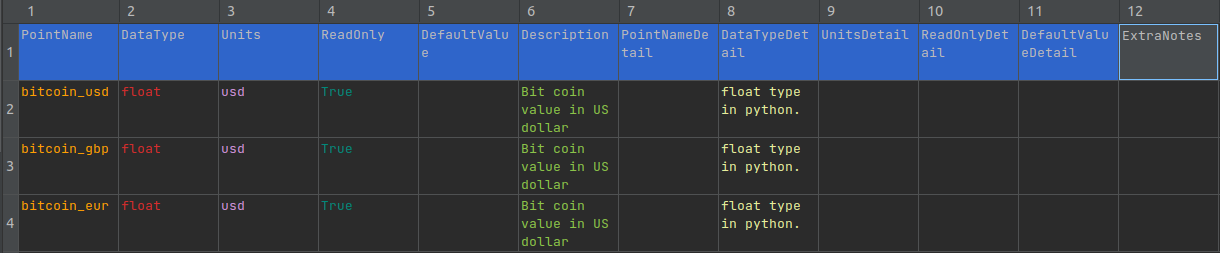

In [42]:
import pandas as pd
config_csv = pd.read_csv("user-dev-driver-template.csv")
config_csv.head()

,PointName,DataType,Units,ReadOnly,DefaultValue,Description,PointNameDetail,DataTypeDetail,UnitsDetail,ReadOnlyDetail,DefaultValueDetail,ExtraNotes,Unnamed: 12
0,bitcoin_usd,float,usd,True,NaN,Bit coin value in US dollar,NaN,float type in python.,NaN,NaN,NaN,NaN,NaN
1,bitcoin_gbp,float,usd,True,NaN,Bit coin value in US dollar,NaN,float type in python.,NaN,NaN,NaN,NaN,NaN
2,bitcoin_eur,float,usd,True,NaN,Bit coin value in US dollar,NaN,float type in python.,NaN,NaN,NaN,NaN,NaN


In [44]:
config_csv.to_dict()

{'PointName': {0: 'bitcoin_usd', 1: 'bitcoin_gbp', 2: 'bitcoin_eur'},
 'DataType': {0: 'float', 1: 'float', 2: 'float'},
 'Units': {0: 'usd', 1: 'usd', 2: 'usd'},
 'ReadOnly': {0: True, 1: True, 2: True},
 'DefaultValue': {0: nan, 1: nan, 2: nan},
 'Description': {0: 'Bit coin value in US dollar',
  1: 'Bit coin value in US dollar',
  2: 'Bit coin value in US dollar'},
 'PointNameDetail': {0: nan, 1: nan, 2: nan},
 'DataTypeDetail': {0: 'float type in python.',
  1: 'float type in python.',
  2: 'float type in python.'},
 'UnitsDetail': {0: nan, 1: nan, 2: nan},
 'ReadOnlyDetail': {0: nan, 1: nan, 2: nan},
 'DefaultValueDetail': {0: nan, 1: nan, 2: nan},
 'ExtraNotes': {0: nan, 1: nan, 2: nan},
 'Unnamed: 12': {0: nan, 1: nan, 2: nan}}

In [45]:
config_csv.to_json()

'{"PointName":{"0":"bitcoin_usd","1":"bitcoin_gbp","2":"bitcoin_eur"},"DataType":{"0":"float","1":"float","2":"float"},"Units":{"0":"usd","1":"usd","2":"usd"},"ReadOnly":{"0":true,"1":true,"2":true},"DefaultValue":{"0":null,"1":null,"2":null},"Description":{"0":"Bit coin value in US dollar","1":"Bit coin value in US dollar","2":"Bit coin value in US dollar"},"PointNameDetail":{"0":null,"1":null,"2":null},"DataTypeDetail":{"0":"float type in python.","1":"float type in python.","2":"float type in python."},"UnitsDetail":{"0":null,"1":null,"2":null},"ReadOnlyDetail":{"0":null,"1":null,"2":null},"DefaultValueDetail":{"0":null,"1":null,"2":null},"ExtraNotes":{"0":null,"1":null,"2":null},"Unnamed: 12":{"0":null,"1":null,"2":null}}'

In [4]:
# Scafolding provided

In [9]:
import sys
sys.path

['/home/kefei/sandbox/volttron/notebooks',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/kefei/volttron/env/lib/python3.8/site-packages',
 '/home/kefei/volttron']

In [15]:
# add the path if needed
# e.g., sys.path.append("/home/kefei/sandbox/volttron/services/core/PlatformDriverAgent")
sys.path.append("/home/kefei/sandbox/volttron/services/core/PlatformDriverAgent")

# to remove
# sys.path.remove("/some-path")


In [18]:
from platform_driver.interfaces.driver_template import TemplateInterface, TemplateRegister
from platform_driver.interfaces.driver_template import ImplementedRegister, RegisterValue
from typing import List, Optional

# TODO-developer: Your code here
# Add dependency as needed, and update in requirements



# TODO-developer: Your code here
# Change the classname "UserDevelopRegister" as needed
class UserDevelopRegister(TemplateRegister):
    # boilerplate code. Don't touch me.
    def __init__(self, 
                 driver_config: dict, 
                 point_name: str, 
                 data_type: RegisterValue, 
                 units: str, read_only: bool,
                 default_value: Optional[RegisterValue] = None, 
                 description: str = ""): # re-define for redability
        super().__init__(driver_config, point_name, data_type, units, default_value, description)

    def get_register_value(self) -> RegisterValue:
        # TODO-developer: Your code here
        # Implemet get-register-value logic here
        # Note: Keep the method name as it is including the signatures.
        # Use a helper method if needed.
        
        # EXAMPLE:
        # def get_register_value(self):
        #    return _get_register_value_helper(url=self.driver_config.get("url"))
        # def _get_register_value_helper(self, url: str):
        #    ...
        pass



        
        
# TODO-developer: Your code here
# fill in regeister_types with register types accordingly
# EXAMPLE:
# register_types = [UserDevelopRegister, UserDevelopRegister]
register_types: List[ImplementedRegister]
register_types = []


# boilerplate code. Don't touch me.
class Interface(TemplateInterface):
    def pass_register_types(self):
        return register_types




In [20]:
from platform_driver.interfaces.driver_template import TemplateInterface, TemplateRegister
from platform_driver.interfaces.driver_template import ImplementedRegister, RegisterValue
from typing import List, Optional

# TODO-developer: Your code here
# Add dependency as needed, and update in requirements
import json



# TODO-developer: Your code here
# Change the classname "UserDevelopRegister" as needed
class UserDevelopRegister(TemplateRegister):
    # boilerplate code. Don't touch me.
    def __init__(self, 
                 driver_config: dict, 
                 point_name: str, 
                 data_type: RegisterValue, 
                 units: str, read_only: bool,
                 default_value: Optional[RegisterValue] = None, 
                 description: str = ""): # re-define for redability
        super().__init__(driver_config, point_name, data_type, units, default_value, description)

    def get_register_value(self) -> RegisterValue:
        # TODO-developer: Your code here
        # Implemet get-register-value logic here
        # Note: Keep the method name as it is including the signatures.
        # Use a helper method if needed.
        
        # EXAMPLE:
        # def get_register_value(self) -> RegisterValue:
        #    return _get_register_value_helper(url=self.driver_config.get("url"))
        # def _get_register_value_helper(self, url: str):
        #    ...
        
#         print("silly implementation")
        return self._get_json_fromrestapi(url="https://api.coindesk.com/v1/bpi/currentprice.json")
    
    def _get_json_fromrestapi(self, url: str) -> dict:
        response: json = requests.get(url)
        response_str: str = response.json()
        return response_str



        
        
# TODO-developer: Your code here
# fill in regeister_types with register types accordingly
# EXAMPLE:
# register_types = [UserDevelopRegister, UserDevelopRegister]
register_types: List[ImplementedRegister]
register_types = []


# boilerplate code. Don't touch me.
class Interface(TemplateInterface):
    def pass_register_types(self):
        return register_types




In [21]:
udr = UserDevelopRegister(driver_config={},
    point_name="point_name_demo",
    data_type=str,
    units="1",
    read_only=True,
    default_value=None,
    description='',)

In [22]:
# Note: your result would be different
udr.get_register_value()

{'time': {'updated': 'May 18, 2022 04:08:00 UTC',
  'updatedISO': '2022-05-18T04:08:00+00:00',
  'updateduk': 'May 18, 2022 at 05:08 BST'},
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org',
 'chartName': 'Bitcoin',
 'bpi': {'USD': {'code': 'USD',
   'symbol': '&#36;',
   'rate': '29,787.2002',
   'description': 'United States Dollar',
   'rate_float': 29787.2002},
  'GBP': {'code': 'GBP',
   'symbol': '&pound;',
   'rate': '24,342.8149',
   'description': 'British Pound Sterling',
   'rate_float': 24342.8149},
  'EUR': {'code': 'EUR',
   'symbol': '&euro;',
   'rate': '28,650.6696',
   'description': 'Euro',
   'rate_float': 28650.6696}}}

### Tips: use a json reader to view the result
ref:
* https://jsoneditoronline.org/#left=local.pocaba
* https://codebeautify.org/jsonviewer

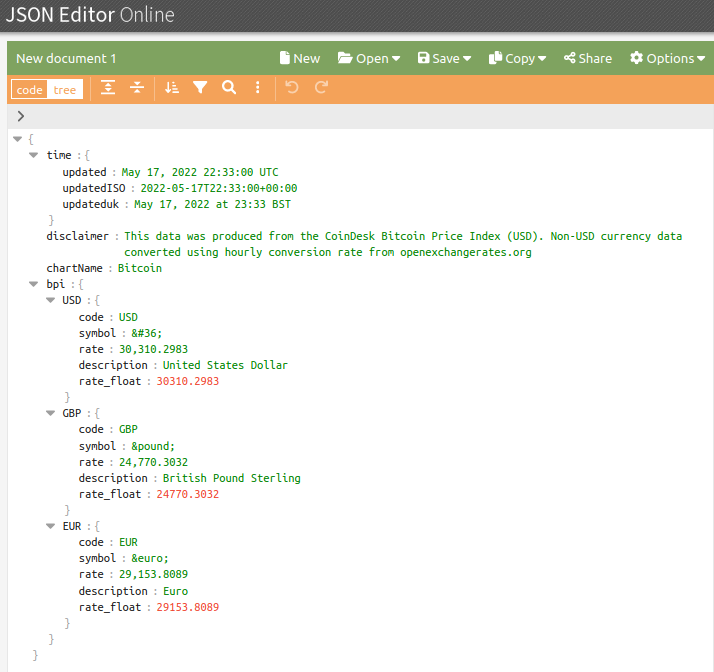

In [23]:
sample_response: dict = {'time': {'updated': 'May 17, 2022 22:33:00 UTC',
  'updatedISO': '2022-05-17T22:33:00+00:00',
  'updateduk': 'May 17, 2022 at 23:33 BST'},
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org',
 'chartName': 'Bitcoin',
 'bpi': {'USD': {'code': 'USD',
   'symbol': '&#36;',
   'rate': '30,310.2983',
   'description': 'United States Dollar',
   'rate_float': 30310.2983},
  'GBP': {'code': 'GBP',
   'symbol': '&pound;',
   'rate': '24,770.3032',
   'description': 'British Pound Sterling',
   'rate_float': 24770.3032},
  'EUR': {'code': 'EUR',
   'symbol': '&euro;',
   'rate': '29,153.8089',
   'description': 'Euro',
   'rate_float': 29153.8089}}}
sample_response

{'time': {'updated': 'May 17, 2022 22:33:00 UTC',
  'updatedISO': '2022-05-17T22:33:00+00:00',
  'updateduk': 'May 17, 2022 at 23:33 BST'},
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org',
 'chartName': 'Bitcoin',
 'bpi': {'USD': {'code': 'USD',
   'symbol': '&#36;',
   'rate': '30,310.2983',
   'description': 'United States Dollar',
   'rate_float': 30310.2983},
  'GBP': {'code': 'GBP',
   'symbol': '&pound;',
   'rate': '24,770.3032',
   'description': 'British Pound Sterling',
   'rate_float': 24770.3032},
  'EUR': {'code': 'EUR',
   'symbol': '&euro;',
   'rate': '29,153.8089',
   'description': 'Euro',
   'rate_float': 29153.8089}}}

In [24]:
time_updated: str = sample_response.get("time").get("updated")
time_updated

'May 17, 2022 22:33:00 UTC'

In [25]:
bitcoin_USD: str = sample_response.get("bpi").get("USD").get("rate")
bitcoin_USD

'30,310.2983'

In [26]:
bitcoin_GBP: str = sample_response.get("bpi").get("GBP").get("rate")
bitcoin_GBP

'24,770.3032'

In [27]:
bitcoin_EUR: str = sample_response.get("bpi").get("EUR").get("rate")
bitcoin_EUR

'29,153.8089'

In [28]:
from platform_driver.interfaces.driver_template import TemplateInterface, TemplateRegister
from platform_driver.interfaces.driver_template import ImplementedRegister, RegisterValue
from typing import List, Optional

# TODO-developer: Your code here
# Add dependency as needed, and update in requirements
import json



# TODO-developer: Your code here
# Change the classname "UserDevelopRegister" as needed
class UserDevelopRegisterTimeUpdated(TemplateRegister):
    # boilerplate code. Don't touch me.
    def __init__(self, 
                 driver_config: dict, 
                 point_name: str, 
                 data_type: RegisterValue, 
                 units: str, read_only: bool,
                 default_value: Optional[RegisterValue] = None, 
                 description: str = ""): # re-define for redability
        super().__init__(driver_config, point_name, data_type, units, default_value, description)

    def get_register_value(self) -> RegisterValue:
        # TODO-developer: Your code here
        # Implemet get-register-value logic here
        # Note: Keep the method name as it is including the signatures.
        # Use a helper method if needed.
        
        # EXAMPLE:
        # def get_register_value(self) -> RegisterValue:
        #    return _get_register_value_helper(url=self.driver_config.get("url"))
        # def _get_register_value_helper(self, url: str):
        #    ...
        
#         print("silly implementation")
        return self._get_json_fromrestapi(url="https://api.coindesk.com/v1/bpi/currentprice.json")
    
    def _get_json_fromrestapi(self, url: str) -> dict:
        response: json = requests.get(url)
        response_str: str = response.json()
        time_updated: str = response_str.get("time").get("updated")

        return time_updated


class UserDevelopRegisterBitcoinUSD(TemplateRegister):
    # boilerplate code. Don't touch me.
    def __init__(self, 
                 driver_config: dict, 
                 point_name: str, 
                 data_type: RegisterValue, 
                 units: str, read_only: bool,
                 default_value: Optional[RegisterValue] = None, 
                 description: str = ""): # re-define for redability
        super().__init__(driver_config, point_name, data_type, units, default_value, description)

    def get_register_value(self) -> RegisterValue:
        return self._get_json_fromrestapi(url="https://api.coindesk.com/v1/bpi/currentprice.json")
    
    def _get_json_fromrestapi(self, url: str) -> dict:
        response: json = requests.get(url)
        response_str: str = response.json()
        bitcoin_usd: str = response_str.get("bpi").get("USD").get("rate")

        return bitcoin_usd
    
class UserDevelopRegisterBitcoinGBP(TemplateRegister):
    # boilerplate code. Don't touch me.
    def __init__(self, 
                 driver_config: dict, 
                 point_name: str, 
                 data_type: RegisterValue, 
                 units: str, read_only: bool,
                 default_value: Optional[RegisterValue] = None, 
                 description: str = ""): # re-define for redability
        super().__init__(driver_config, point_name, data_type, units, default_value, description)

    def get_register_value(self) -> RegisterValue:
        return self._get_json_fromrestapi(url="https://api.coindesk.com/v1/bpi/currentprice.json")
    
    def _get_json_fromrestapi(self, url: str) -> dict:
        response: json = requests.get(url)
        response_str: str = response.json()
        bitcoin_gbp: str = response_str.get("bpi").get("GBP").get("rate")

        return bitcoin_gbp
    

class UserDevelopRegisterBitcoinEUR(TemplateRegister):
    # boilerplate code. Don't touch me.
    def __init__(self, 
                 driver_config: dict, 
                 point_name: str, 
                 data_type: RegisterValue, 
                 units: str, read_only: bool,
                 default_value: Optional[RegisterValue] = None, 
                 description: str = ""): # re-define for redability
        super().__init__(driver_config, point_name, data_type, units, default_value, description)

    def get_register_value(self) -> RegisterValue:
        return self._get_json_fromrestapi(url="https://api.coindesk.com/v1/bpi/currentprice.json")
    
    def _get_json_fromrestapi(self, url: str) -> dict:
        response: json = requests.get(url)
        response_str: str = response.json()
        bitcoin_eur: str = response_str.get("bpi").get("EUR").get("rate")

        return bitcoin_eur

        
        
# TODO-developer: Your code here
# fill in regeister_types with register types accordingly
# EXAMPLE:
# register_types = [UserDevelopRegister, UserDevelopRegister]
register_types: List[ImplementedRegister]
register_types = []


# boilerplate code. Don't touch me.
class Interface(TemplateInterface):
    def pass_register_types(self):
        return register_types




In [29]:
udr_timeupdated = UserDevelopRegisterTimeUpdated(driver_config={},
    point_name="time_updated",
    data_type=str,
    units="1",
    read_only=True,
    default_value=None,
    description='',)
udr_timeupdated.get_register_value()

'May 18, 2022 04:08:00 UTC'

In [30]:
udr_USD = UserDevelopRegisterBitcoinUSD(driver_config={},
    point_name="bitcoin_usd",
    data_type=str,
    units="1",
    read_only=True,
    default_value=None,
    description='',)
udr_USD.get_register_value()

'29,787.2002'

In [31]:
udr_GBP = UserDevelopRegisterBitcoinGBP(driver_config={},
    point_name="bitcoin_gbp",
    data_type=str,
    units="1",
    read_only=True,
    default_value=None,
    description='',)
udr_GBP.get_register_value()

'24,342.8149'

In [32]:
udr_EUR = UserDevelopRegisterBitcoinEUR(driver_config={},
    point_name="bitcoin_eru",
    data_type=str,
    units="1",
    read_only=True,
    default_value=None,
    description='',)
udr_EUR.get_register_value()

'28,650.6696'

In [33]:
# That's a bit bulky, let's simplify that. (e.g., Generalize the method)
# The idea: let's use point_name to distinguish the method
# Note: using point name is a best practice/design-pattern to develop user register

In [38]:
from platform_driver.interfaces.driver_template import TemplateInterface, TemplateRegister
from platform_driver.interfaces.driver_template import ImplementedRegister, RegisterValue
from typing import List, Optional
import numpy as np

# TODO-developer: Your code here
# Add dependency as needed, and update in requirements
import json



# TODO-developer: Your code here
# Change the classname "UserDevelopRegister" as needed
class UserDevelopRegisterBitcoinRestAPI(TemplateRegister):
    # boilerplate code. Don't touch me.
    def __init__(self, 
                 driver_config: dict, 
                 point_name: str, 
                 data_type: RegisterValue, 
                 units: str, read_only: bool,
                 default_value: Optional[RegisterValue] = None, 
                 description: str = ""): # re-define for redability
        super().__init__(driver_config, point_name, data_type, units, default_value, description)

    def get_register_value(self) -> RegisterValue:
        # TODO-developer: Your code here
        # Implemet get-register-value logic here
        # Note: Keep the method name as it is including the signatures.
        # Use a helper method if needed.
        
        # EXAMPLE:
        # def get_register_value(self) -> RegisterValue:
        #    return _get_register_value_helper(url=self.driver_config.get("url"))
        # def _get_register_value_helper(self, url: str):
        #    ...
        
#         print("silly implementation")
        return self._get_json_fromrestapi(url="https://api.coindesk.com/v1/bpi/currentprice.json")
    
    def _get_json_fromrestapi(self, url: str) -> dict:
        response: json = requests.get(url)
        response_str: str = response.json()
            
        time_updated: str = response_str.get("time").get("updated")
        bitcoin_usd = response_str.get("bpi").get("USD").get("rate")
        bitcoin_usd = self._save_parse_to_float(bitcoin_usd)
        bitcoin_gbp = response_str.get("bpi").get("GBP").get("rate")
        bitcoin_gbp = self._save_parse_to_float(bitcoin_gbp)
        bitcoin_eur = response_str.get("bpi").get("EUR").get("rate")
        bitcoin_eur = self._save_parse_to_float(bitcoin_eur)
            
        return_point_value: RegisterValue
            
        if self.point_name=="time_updated":
            return_point_value = time_updated
        elif self.point_name=="bitcoin_usd":
            return_point_value = bitcoin_usd
        elif self.point_name=="bitcoin_gbp":
            return_point_value = bitcoin_gbp
        elif self.point_name=="bitcoin_eur":
            return_point_value = bitcoin_eur
        else:
            raise ValueError("Wrong register for Point Name " + self.point_name)
            

        return return_point_value
    
    @staticmethod
    def _save_parse_to_float(str_with_comma: str) -> float:
        # Note: the input is in the form like "30,464.1101"
        num: float
        try:
            num = float(str_with_comma.replace(',',''))
        except:
            num = np.nan
        return num


        
        
# TODO-developer: Your code here
# fill in regeister_types with register types accordingly
# EXAMPLE:
# register_types = [UserDevelopRegister, UserDevelopRegister]
register_types: List[ImplementedRegister]
register_types = []


# boilerplate code. Don't touch me.
class Interface(TemplateInterface):
    def pass_register_types(self):
        return register_types




In [35]:
udr_timeupdated_2 = UserDevelopRegisterBitcoinRestAPI(driver_config={},
    point_name="time_updated",
    data_type=str,
    units="1",
    read_only=True,
    default_value=None,
    description='',)
udr_timeupdated_2.get_register_value()

'May 18, 2022 04:08:00 UTC'

In [40]:
udr_USD_2 = UserDevelopRegisterBitcoinRestAPI(driver_config={},
    point_name="bitcoin_usd",
    data_type=float,
    units="$",
    read_only=True,
    default_value=None,
    description='',)
udr_USD_2.get_register_value()

29787.9332

In [39]:
udr_GPB_2 = UserDevelopRegisterBitcoinRestAPI(driver_config={},
    point_name="bitcoin_gbp",
    data_type=float,
    units="Pound",
    read_only=True,
    default_value=None,
    description='',)
udr_GPB_2.get_register_value()

24356.3041

In [ ]:
# finally add a heartbeat topic (not sure if it is necessary)
# I like it, at least for debug purpose

In [ ]:
from platform_driver.interfaces.driver_template import TemplateInterface, TemplateRegister
from platform_driver.interfaces.driver_template import ImplementedRegister, RegisterValue
from typing import List, Optional
import numpy as np
import random

# TODO-developer: Your code here
# Add dependency as needed, and update in requirements
import json



# TODO-developer: Your code here
# Change the classname "UserDevelopRegister" as needed
class UserDevelopRegisterBitcoinRestAPI(TemplateRegister):
    # boilerplate code. Don't touch me.
    def __init__(self, 
                 driver_config: dict, 
                 point_name: str, 
                 data_type: RegisterValue, 
                 units: str, read_only: bool,
                 default_value: Optional[RegisterValue] = None, 
                 description: str = ""): # re-define for redability
        super().__init__(driver_config, point_name, data_type, units, default_value, description)

    def get_register_value(self) -> RegisterValue:
        # TODO-developer: Your code here
        # Implemet get-register-value logic here
        # Note: Keep the method name as it is including the signatures.
        # Use a helper method if needed.
        
        # EXAMPLE:
        # def get_register_value(self) -> RegisterValue:
        #    return _get_register_value_helper(url=self.driver_config.get("url"))
        # def _get_register_value_helper(self, url: str):
        #    ...
        
#         print("silly implementation")
        # the url will be in the config file
        return self._get_json_fromrestapi(url=self.driver_config.get("url"))
    
    def _get_json_fromrestapi(self, url: str) -> dict:
        response: json = requests.get(url)
        response_str: str = response.json()
            
        time_updated: str = response_str.get("time").get("updated")
        bitcoin_usd = response_str.get("bpi").get("USD").get("rate")
        bitcoin_usd = self._save_parse_to_float(bitcoin_usd)
        bitcoin_gbp = response_str.get("bpi").get("GBP").get("rate")
        bitcoin_gbp = self._save_parse_to_float(bitcoin_gbp)
        bitcoin_eur = response_str.get("bpi").get("EUR").get("rate")
        bitcoin_eur = self._save_parse_to_float(bitcoin_eur)
            
        return_point_value: RegisterValue
            
        if self.point_name=="time_updated":
            return_point_value = time_updated
        elif self.point_name=="bitcoin_usd":
            return_point_value = bitcoin_usd
        elif self.point_name=="bitcoin_gbp":
            return_point_value = bitcoin_gbp
        elif self.point_name=="bitcoin_eur":
            return_point_value = bitcoin_eur
        elif self.point_name=="random_bool":
            return_point_value: bool = random.choice([True, False])
        else:
            raise ValueError("Wrong register for Point Name " + self.point_name)
            

        return return_point_value
    
    @staticmethod
    def _save_parse_to_float(str_with_comma: str) -> float:
        # Note: the input is in the form like "30,464.1101"
        num: float
        try:
            num = float(str_with_comma.replace(',',''))
        except:
            num = np.nan
        return num

        
        
# TODO-developer: Your code here
# fill in regeister_types with register types accordingly
# EXAMPLE:
# register_types = [UserDevelopRegister, UserDevelopRegister]
register_types: List[ImplementedRegister]
register_types = [UserDevelopRegisterBitcoinRestAPI] * 4


# boilerplate code. Don't touch me.
class Interface(TemplateInterface):
    def pass_register_types(self):
        return register_types


